# Step 1: Exploratory Data Analysis (EDA)

In [1]:
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla - MLR.csv to ToyotaCorolla - MLR.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:

# Load the dataset
data = pd.read_csv("ToyotaCorolla - MLR.csv")




In [4]:

# Summary statistics
summary_stats = data.describe()
print(summary_stats)




              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

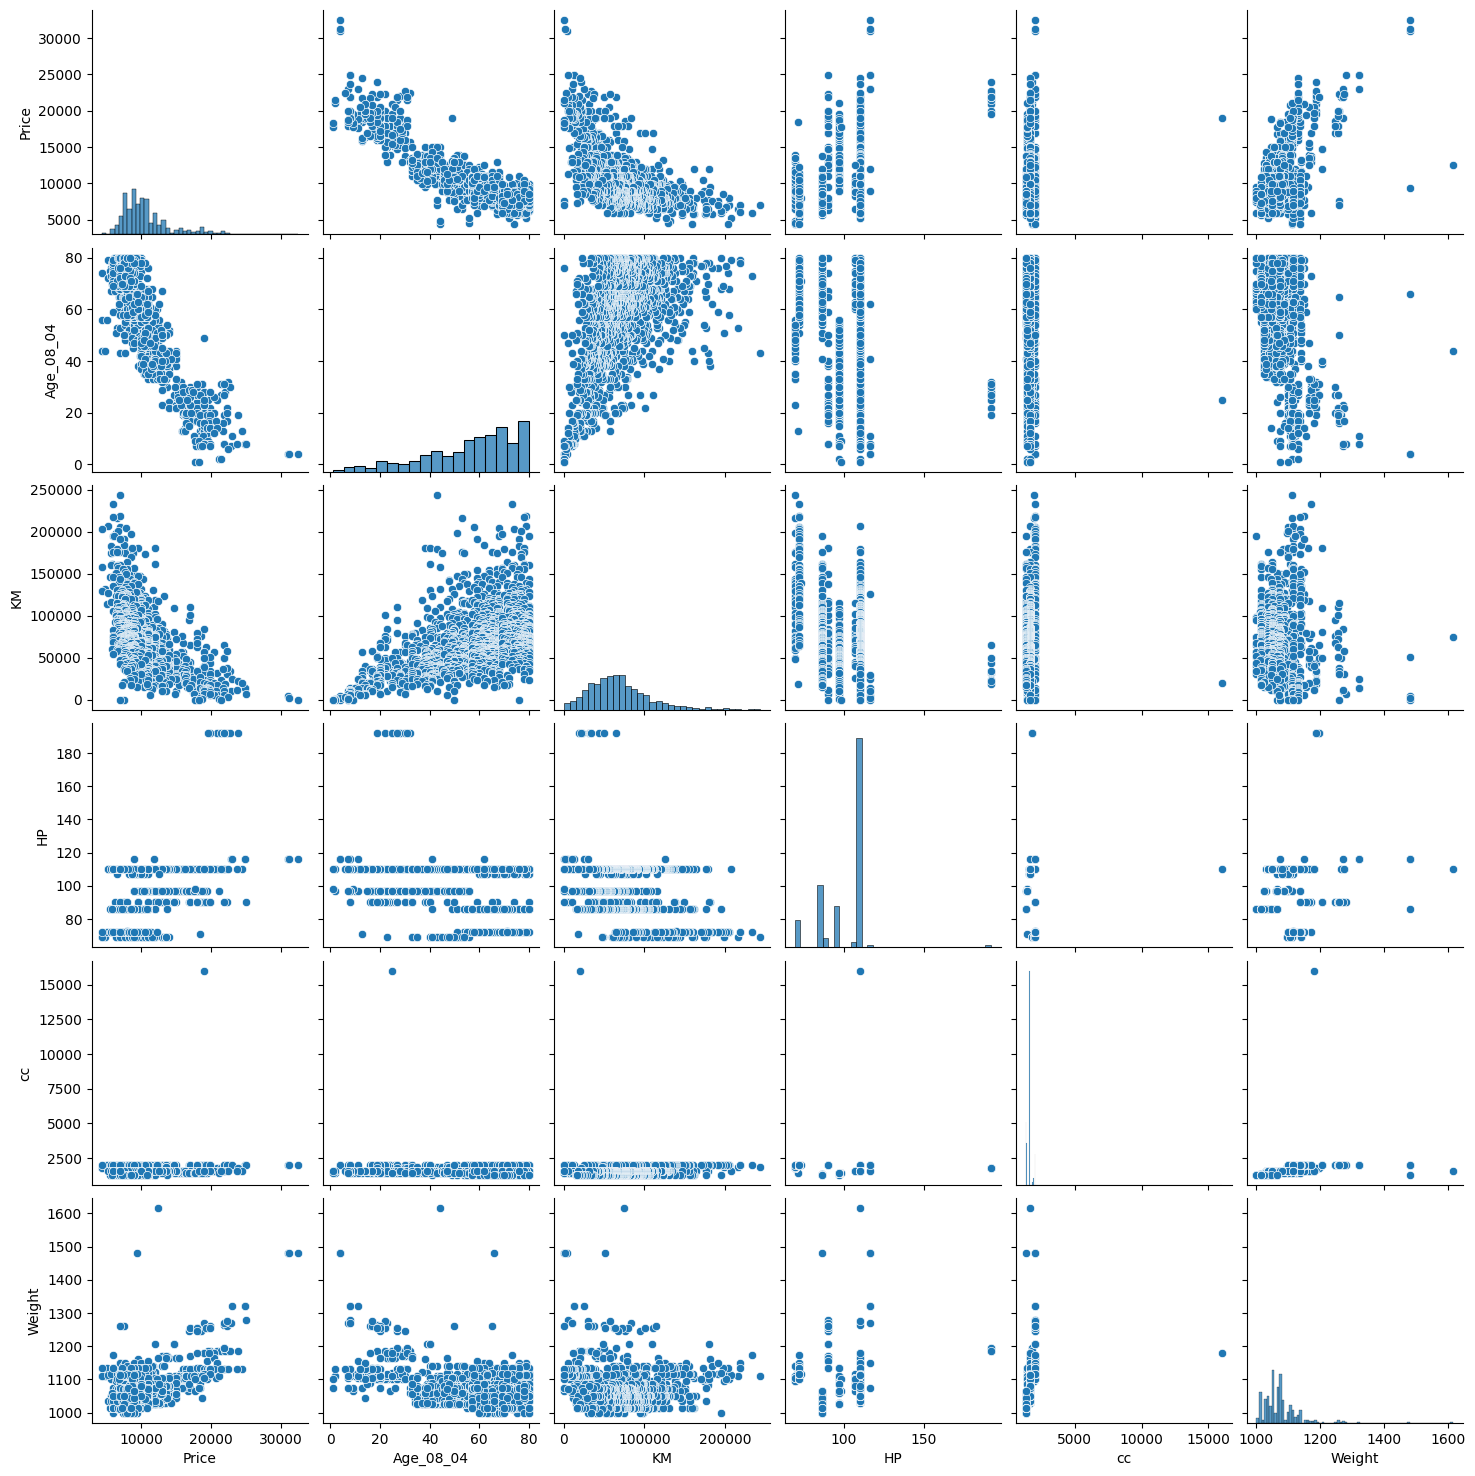

In [5]:

# Pair plot
sns.pairplot(data[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight']])
plt.show()

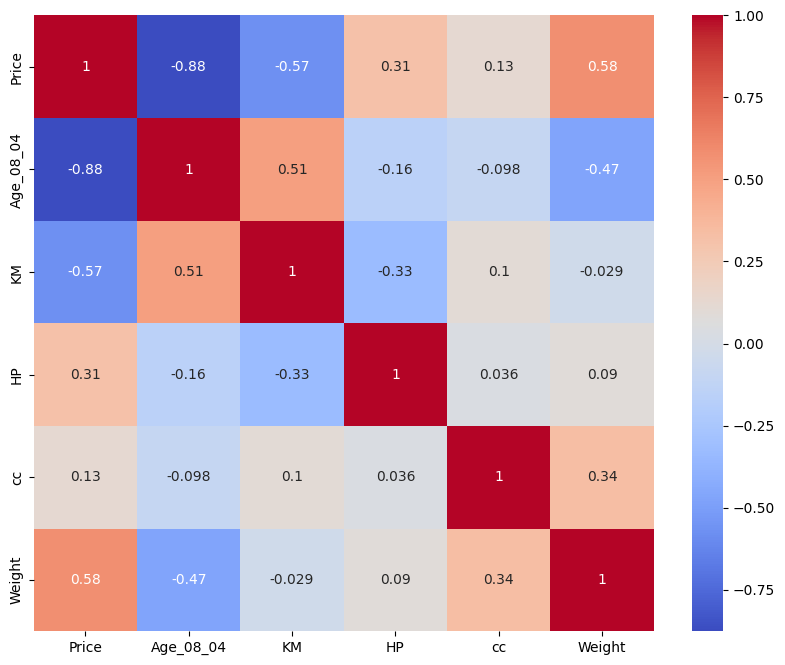

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight']].corr(), annot=True, cmap='coolwarm')
plt.show()

# Step 2: Data Preprocessing

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


encoder = OneHotEncoder(drop='first', sparse_output=False)  # Use sparse_output=False instead of sparse
fuel_type_encoded = encoder.fit_transform(data[['Fuel_Type']])

fuel_type_df = pd.DataFrame(fuel_type_encoded, columns=encoder.get_feature_names_out(['Fuel_Type']))
data = pd.concat([data, fuel_type_df], axis=1)

data = data.drop(columns=['Fuel_Type'])

X = data.drop('Price', axis=1)
y = data['Price']

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")



Training set size: (1148, 11)
Testing set size: (288, 11)


# #Model 1 – Standard Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model1 = LinearRegression()
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)

mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

print(f"Model 1 - Linear Regression: MSE = {mse1}, R2 = {r2_1}")


Model 1 - Linear Regression: MSE = 2203043.8231437025, R2 = 0.8348888040611082


# #Model 2 – Lasso Regression

In [9]:
from sklearn.linear_model import Lasso

model2 = Lasso(alpha=0.1)
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print(f"Model 2 - Lasso Regression: MSE = {mse2}, R2 = {r2_2}")


Model 2 - Lasso Regression: MSE = 2202270.2600246817, R2 = 0.8349467801805


## Model 3 – Ridge Regression

In [10]:
from sklearn.linear_model import Ridge

model3 = Ridge(alpha=1.0)
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)

mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)

print(f"Model 3 - Ridge Regression: MSE = {mse3}, R2 = {r2_3}")


Model 3 - Ridge Regression: MSE = 2199746.370233341, R2 = 0.8351359377712335


# Step 4: Evaluation

In [11]:
results = {
    "Model": ["Linear Regression", "Lasso Regression", "Ridge Regression"],
    "MSE": [mse1, mse2, mse3],
    "R2": [r2_1, r2_2, r2_3]
}

results_df = pd.DataFrame(results)
print(results_df)


               Model           MSE        R2
0  Linear Regression  2.203044e+06  0.834889
1   Lasso Regression  2.202270e+06  0.834947
2   Ridge Regression  2.199746e+06  0.835136



I began by performing **Exploratory Data Analysis (EDA)** to gain a thorough understanding of the dataset. This involved summarizing the data with descriptive statistics and visualizing key relationships between variables to detect patterns, correlations, and potential anomalies.

Next, I **preprocessed the data**, focusing on encoding categorical variables and ensuring the data was ready for modeling. This was followed by splitting the dataset into **training and testing sets** to ensure that model evaluation could be done accurately.

I then developed **three models**:
- The first model was a **standard multiple linear regression**, serving as the baseline.
- The second and third models applied **Lasso regression** and **Ridge regression**, respectively. These methods introduced regularization to the models.

To assess the models, I used key evaluation metrics such as **Mean Squared Error (MSE)** and **R-squared**, allowing me to compare performance and determine which model was most effective.

Lastly, I implemented **Lasso and Ridge regularization techniques** to address potential overfitting and enhance model generalization, ultimately leading to improved prediction accuracy.

